In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

import json
from numpy import array
import matplotlib.patches as mpatches

import matplotlib.cm as cm

path = Path.cwd()/'logs/cifar10'
path

logfiles = [f for f in path.iterdir() if '.DS_Store' not in f.name]
logfiles

[PosixPath('/Users/davoodwadi/code/logs/cifar10/AdaBelief_1e-06_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveAdamW_1e-06_4_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveRAdam_0.01_3_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveAdamW_1e-06_3_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveRAdam_0.01_4_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/RAdam_0.01_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/AdaBelief_0.0001_5_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveBelief_1e-05_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/AdaBelief_0.0001_2_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/AdaBelief_0.01_5_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/ActiveAdamW_0.01_1_cifar10.json'),
 PosixPath('/Users/davoodwadi/code/logs/cifar10/AdaBelief_0.001_4_cifar10.json'),
 PosixPath('/Use

In [2]:
def get_meta(filepath):
    optim = filepath.stem.split('_')[0]
    lr = float(filepath.stem.split('_')[1])
    try:
        runNo = int(filepath.stem.split('_')[2])
    except:
        runNo = 0
    return optim, lr, runNo

class Log:
    def __init__(self, filePath):
        self.filePath = filePath
        self.open_file()
#         self.process_raw()
        self.get_accs()
        
    def process_raw(self):
        self.log = self.log.split('\n')
        self.log = [l for l in self.log if 'acc' in l]
        self.log = [d.split(',')[:3] for d in self.log]
    
    def open_file(self):
        with open(self.filePath, 'r') as f:
            self.log = json.load(f)
            self.optim = self.filePath.stem.split('_')[0]
            self.lr = float(self.filePath.stem.split('_')[1])
        try:
            self.runNo = int(self.filepath.stem.split('_')[2])
        except:
            self.runNo = 0
        
    def get_accs(self):
        self.train_losses = array(self.log['train_losses'])
        self.accs = array(self.log['accs'])
        self.epoch = array(self.log['epochs'])
        

def min_epoch(logs):
    mini = float('inf')
    for optim in logs.keys():
        for lr in logs[optim].keys():
            for runNo in logs[optim][lr].keys():
                if len(logs[optim][lr][runNo].epoch)<mini: mini=len(logs[optim][lr][runNo].epoch)
    return mini

In [4]:
class dic(dict):
    def __getattr__(self, attr):
        return self[attr]

In [3]:
l = lambda : defaultdict(dict)
logs = defaultdict(l)
for file in logfiles:
    optim, lr, runNo = get_meta(file)
    logs[optim][lr][runNo] = Log(file)

In [20]:
mini = min_epoch(logs)
mini

100

In [20]:
logs['AdamW'][0.001]

{1: <__main__.Log at 0x7f80fde17ee0>,
 6: <__main__.Log at 0x7f80fde17490>,
 0: <__main__.Log at 0x7f8100638100>,
 2: <__main__.Log at 0x7f8100638280>,
 5: <__main__.Log at 0x7f8100638310>,
 4: <__main__.Log at 0x7f81006389d0>,
 3: <__main__.Log at 0x7f8100638a90>}

## testing grouped plots

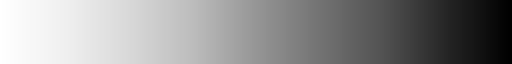

In [5]:
Blues = cm.get_cmap('Blues')
Blues

Reds = cm.get_cmap('Reds')
Reds

Greys = cm.get_cmap("Greys")
Greys

In [6]:
logs

defaultdict(<function __main__.<lambda>()>,
            {'AdaBelief': defaultdict(dict,
                         {1e-06: {0: <__main__.Log at 0x7f7c24aa8dc0>,
                           1: <__main__.Log at 0x7f7c24aabd30>,
                           6: <__main__.Log at 0x7f7c24aab8e0>,
                           2: <__main__.Log at 0x7f7c24a81a60>,
                           5: <__main__.Log at 0x7f7c24a81be0>,
                           4: <__main__.Log at 0x7f7c24a81c40>,
                           3: <__main__.Log at 0x7f7c24a818e0>},
                          0.0001: {5: <__main__.Log at 0x7f7c24aa8640>,
                           2: <__main__.Log at 0x7f7c24aa8280>,
                           3: <__main__.Log at 0x7f7c24aab280>,
                           4: <__main__.Log at 0x7f7c24aab310>,
                           6: <__main__.Log at 0x7f7c24a81460>,
                           1: <__main__.Log at 0x7f7c24a813d0>,
                           0: <__main__.Log at 0x7f7c24a817f0>},

In [13]:
logs['ActiveAdam0505'][0.001][0].accs.max()

85.12999725341797

In [14]:
logs['ActiveAdam55'][0.001][0].accs.max()

85.91999816894531

In [15]:
logs['ActiveAdamW'][0.001][0].accs.max()

85.79000091552734

In [16]:
logs['AdamW'][0.001][0].accs.max()

85.33999633789062

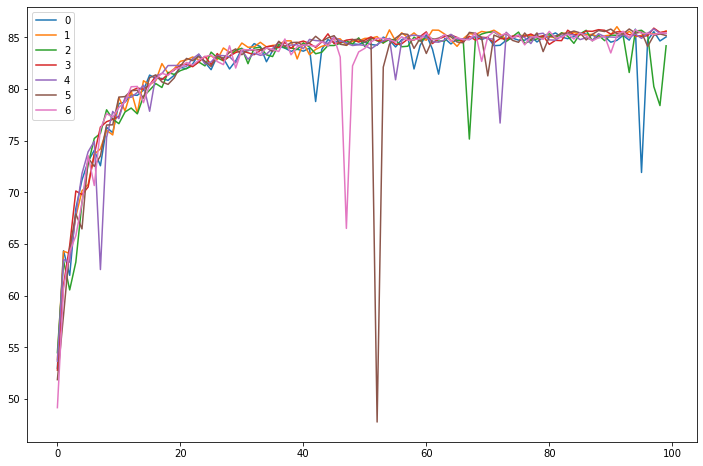

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
optims = ['ActiveAdamW']
# colors = ['red','blue', 'green']

accs=[]

for i, optim in enumerate(optims):
    for seed in range(7):
#         if lr==1e-5 or lr==1e-6: continue
        r0 = logs[optim][0.001][seed].accs
#         if i==0:
        accs.append(r0)
        ax.plot(r0, label=seed)
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


In [10]:
accsArr = np.array(accs)
accsArr.shape

(7, 100)

In [12]:
accsArr.max(1).mean()

85.82142748151507

In [14]:
accsArr.mean(0).max()

85.44428362165179

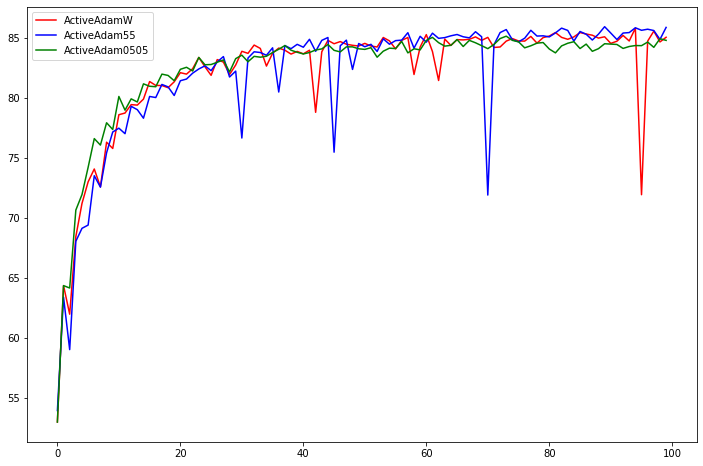

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
optims = ['ActiveAdamW','ActiveAdam55', 'ActiveAdam0505']
colors = ['red','blue', 'green']
alphas={
    0.01: 1,
    0.001: 1,
    0.0001: .4,
    1e-5: .5,
    1e-6: .2
}
for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr in logs[optim].keys():
#         if lr==1e-5 or lr==1e-6: continue
        if lr!=0.001: continue
        r0 = logs[optim][lr][0].accs[:mini]
#         if i==0:
        ax.plot(r0, color=color, label=optim, alpha=alphas[lr])
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


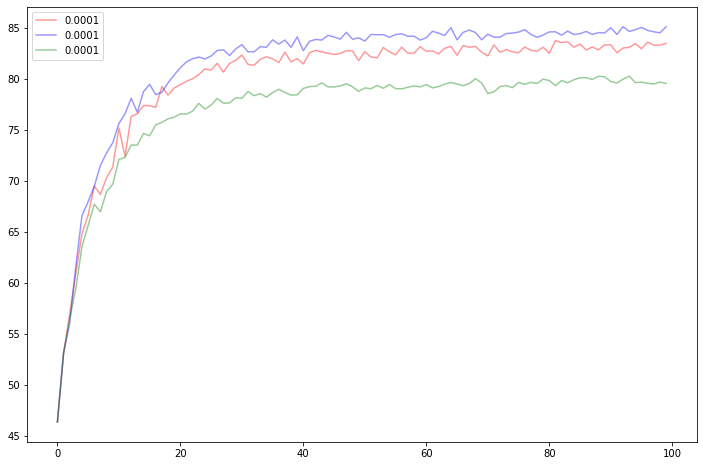

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
optims = ['ActiveAdamW','ActiveAdam55', 'ActiveAdam0505']
colors = ['red','blue', 'green']
alphas={
    0.01: 1,
    0.001: 1,
    0.0001: .4,
    1e-5: .5,
    1e-6: .2
}
for i, (optim, color) in enumerate(zip(optims, colors)):
    for lr in logs[optim].keys():
#         if lr==1e-5 or lr==1e-6: continue
        if lr!=0.0001: continue
        r0 = logs[optim][lr][0].accs[:mini]
#         if i==0:
        ax.plot(r0, color=color, label=lr, alpha=alphas[lr])
#         else:
#             ax.plot(r0, color=color, label=lr)
        
#         ax.plot(r0, label='optim')
#         r1 = logs[optim][lr][1].accs[:mini]
#         r2 = logs[optim][lr][2].accs[:mini]
#         r3 = logs[optim][lr][3].accs[:mini]
#         r4 = logs[optim][lr][4].accs[:mini]
#         r5 = logs[optim][lr][5].accs[:mini]
#         r6 = logs[optim][lr][6].accs[:mini]
ax.legend()
#         lrs = np.stack([r0])
#         logs[optim][lr]['mean'] = lrs.mean(0)
#         logs[optim][lr]['std'] = lrs.std(0)
#         logs[optim][lr]['min'] = lrs.min(0)
#         logs[optim][lr]['max'] = lrs.max(0)    


In [14]:
optim

'ActiveAdamW, ActiveAdam55'

## average and std of accuracy for each optimizer

In [21]:
for optim in logs.keys():
    for lr in logs[optim].keys():
        r0 = logs[optim][lr][0].accs[:mini]
        r1 = logs[optim][lr][1].accs[:mini]
        r2 = logs[optim][lr][2].accs[:mini]
        r3 = logs[optim][lr][3].accs[:mini]
        r4 = logs[optim][lr][4].accs[:mini]
        r5 = logs[optim][lr][5].accs[:mini]
        r6 = logs[optim][lr][6].accs[:mini]

        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean'] = lrs.mean(0)
        logs[optim][lr]['std'] = lrs.std(0)
        logs[optim][lr]['min'] = lrs.min(0)
        logs[optim][lr]['max'] = lrs.max(0)    


In [22]:
optim

'AdamW'

## plots

In [23]:
l = lambda : defaultdict(dict)
logs = defaultdict(l)
for file in logfiles:
    optim, lr, runNo = get_meta(file)
    logs[optim][lr][runNo] = Log(file)

In [26]:
for optim in logs.keys():
    for lr in [0.001,0.0001,1e-5,1e-6]:
        r0 = logs[optim][lr][0].accs[:mini]
        r1 = logs[optim][lr][1].accs[:mini]
        r2 = logs[optim][lr][2].accs[:mini]
        r3 = logs[optim][lr][3].accs[:mini]
        r4 = logs[optim][lr][4].accs[:mini]
        r5 = logs[optim][lr][5].accs[:mini]
        r6 = logs[optim][lr][6].accs[:mini]
    #     lrs = np.stack([lr1,lr2,lr3,lr4,lr5])
        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean'] = lrs.mean(0)
        logs[optim][lr]['std'] = lrs.std(0)
        logs[optim][lr]['min'] = lrs.min(0)
        logs[optim][lr]['max'] = lrs.max(0)    
    
#     print(lrs.shape)
#     print(logs[optim])

In [54]:
float('ActiveAdam-.5-.9'.split('-')[2])

0.9

In [168]:
logs[optim][1e-06][0]

In [9]:
for optim in logs.keys():
    for lr in [0.001,0.0001,1e-5,1e-6]:
        r0 = logs[optim][lr][0].train_losses[:mini]
        r1 = logs[optim][lr][1].train_losses[:mini]
        r2 = logs[optim][lr][2].train_losses[:mini]
        r3 = logs[optim][lr][3].train_losses[:mini]
        r4 = logs[optim][lr][4].train_losses[:mini]
        r5 = logs[optim][lr][5].train_losses[:mini]
        r6 = logs[optim][lr][6].train_losses[:mini]
    #     lrs = np.stack([lr1,lr2,lr3,lr4,lr5])
        lrs = np.stack([r0,r1,r2,r3,r4,r5,r6])
        logs[optim][lr]['mean_loss'] = lrs.mean(0)
        logs[optim][lr]['std_loss'] = lrs.std(0)
        logs[optim][lr]['min_loss'] = lrs.min(0)
        logs[optim][lr]['max_loss'] = lrs.max(0)    
    
#     print(lrs.shape)
#     print(logs[optim])

Text(0.04, 0.5, 'Accuracy')

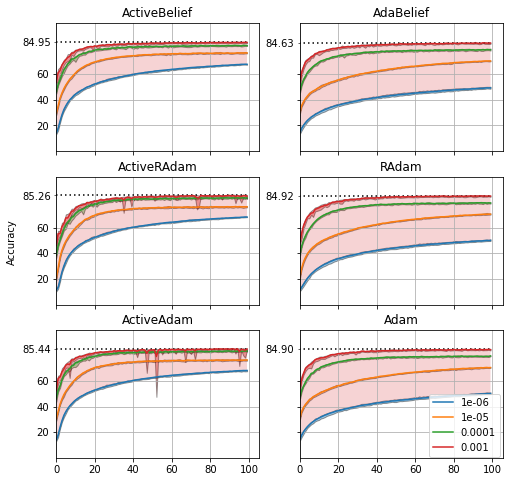

In [28]:
fig, axes = plt.subplots(3,2, sharey=False, sharex=True, figsize=(8,8))
for i, (ax, optim) in enumerate(zip(axes.flat, ['ActiveBelief', 'AdaBelief', 'ActiveRAdam', 'RAdam', 'ActiveAdamW', 'AdamW'])):
    if i%2==1:
        ax.set_yticklabels([])
    max_y = -float('inf')
    for lr in sorted([0.001,0.0001,1e-5,1e-6]):
        if lr==0.01: continue
        l, = ax.plot(logs[optim][lr]['mean'][:mini], label=lr)
        alpha=.4
        if 'W' in optim:
            ax.set_title(optim[:-1])
        else:
            ax.set_title(optim)
        max_y = max(max_y, max(logs[optim][lr]['mean'][:mini]))
        color = l.get_color()
        minn = logs[optim][lr]['min'][:mini]
        maxx = logs[optim][lr]['max'][:mini]
        mean = logs[optim][lr]['mean'][:mini]
        std = logs[optim][lr]['std'][:mini]
        ax.fill_between(range(mini), minn, maxx, 
                        alpha=alpha, edgecolor='black', facecolor=color)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0, top=100)
    ax.set_yticks([]+list(np.arange(20,80,20)))
    alpha=.2
    ax.fill_between(range(mini), logs[optim][1e-6]['mean'], logs[optim][0.001]['mean'], 
                        alpha=alpha, edgecolor='none', facecolor=color)
    ax.grid(b=True)
    if i==len(axes.flatten())-1:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.81,0.075))
#         ax.set_ylabel('Accuracy')
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')

In [21]:
fig.savefig('./plots/cifar10-comparative.png', dpi=300, bbox_inches='tight')

Text(0.04, 0.5, 'Train Loss')

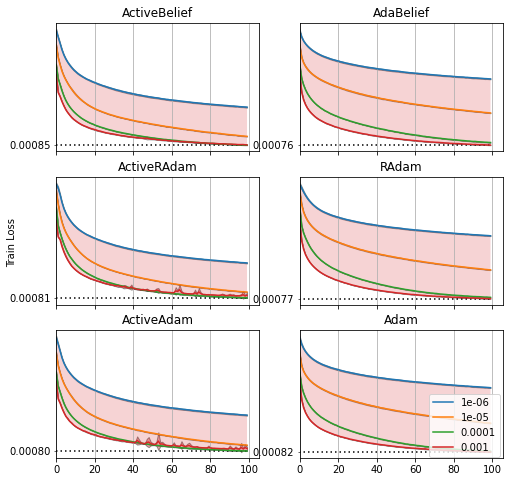

In [19]:
fig, axes = plt.subplots(3,2, sharey=False, sharex=True, figsize=(8,8))
for i, (ax, optim) in enumerate(zip(axes.flat, ['ActiveBelief', 'AdaBelief', 'ActiveRAdam', 'RAdam', 'ActiveAdamW', 'AdamW'])):
    if i%2==1:
        ax.set_yticklabels([])
    max_y = float('inf')
    for lr in sorted([0.001,0.0001,1e-5,1e-6]):
        if lr==0.01: continue
        l, = ax.plot(logs[optim][lr]['mean_loss'][:mini], label=lr)
        alpha=.4
        if 'W' in optim:
            ax.set_title(optim[:-1])
        else:
            ax.set_title(optim)
        max_y = min(max_y, min(logs[optim][lr]['mean_loss'][:mini]))
        color = l.get_color()
        minn = logs[optim][lr]['min_loss'][:mini]
        maxx = logs[optim][lr]['max_loss'][:mini]
        mean = logs[optim][lr]['mean_loss'][:mini]
        std = logs[optim][lr]['std_loss'][:mini]
        ax.fill_between(range(mini), mean-std, mean+std, 
                        alpha=alpha, edgecolor='black', facecolor=color)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_xlim(left=0)
#     ax.set_ylim(bottom=0, top=100)
    ax.set_yticks([]+list(np.arange(20,80,20)))
    alpha=.2
    ax.fill_between(range(mini), logs[optim][0.001]['mean_loss'], logs[optim][1e-6]['mean_loss'], 
                        alpha=alpha, edgecolor='none', facecolor=color)
    ax.grid(b=True)
    if i==len(axes.flatten())-1:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(.81,0.075))
#         ax.set_ylabel('Accuracy')
fig.text(0.04, 0.5, 'Train Loss', va='center', rotation='vertical')

# mean std

In [152]:
for optim in logs.keys():
    lr1 = logs[optim][0.01]['mean'][:mini]
    lr2 = logs[optim][0.001]['mean'][:mini]
    lr3 = logs[optim][0.0001]['mean'][:mini]
    lr4 = logs[optim][1e-5]['mean'][:mini]
    lr5 = logs[optim][1e-6]['mean'][:mini]

    lrs = np.stack([lr2,lr3,lr4,lr5])
    logs[optim]['mean'] = lrs.mean(0)
    logs[optim]['std'] = lrs.std(0)
    logs[optim]['min'] = lrs.min(0)
    logs[optim]['max'] = lrs.max(0)    
    

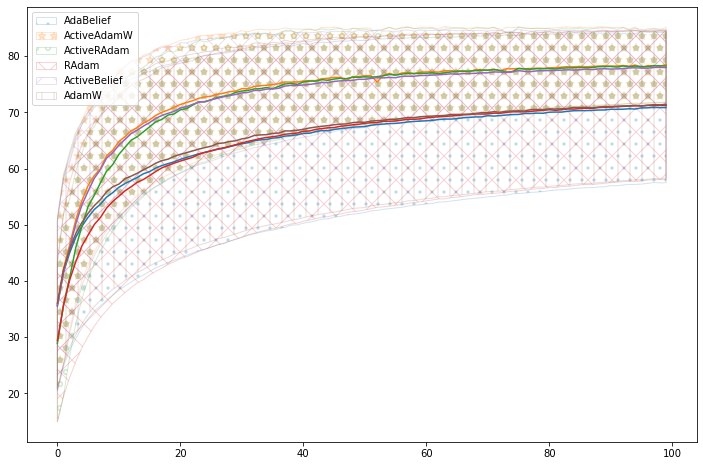

In [153]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=[12,8])
hatches = {
    'ActiveAdamW': '*',
    'AdaBelief': '.',
    'AdamW': '|',
    'RAdam': 'X',
    'ActiveRAdam': 'o',
    'ActiveBelief': 'x'
}
polys=[]
optims=[]
for i, optim in enumerate(logs.keys()):
    mean = logs[optim]['mean']
    std = logs[optim]['std']
    minn = logs[optim]['min']
    maxx = logs[optim]['max']
    l, = ax.plot(mean, label=optim)
    color = l.get_color()
    if optim=='ActiveAdamW':
        alpha=.2
    else:
        alpha=.2
    poly =ax.fill_between(range(mini), mean-std, mean+std, alpha=alpha, edgecolor=color, facecolor='none', hatch=hatches[optim])
    polys.append(poly)
    optims.append(optim)
ax.legend(polys, optims)

In [154]:
for i, (optim, ax) in enumerate(zip(optims, axes.flatten())):
    print(optim)

AdaBelief
ActiveAdamW
ActiveRAdam


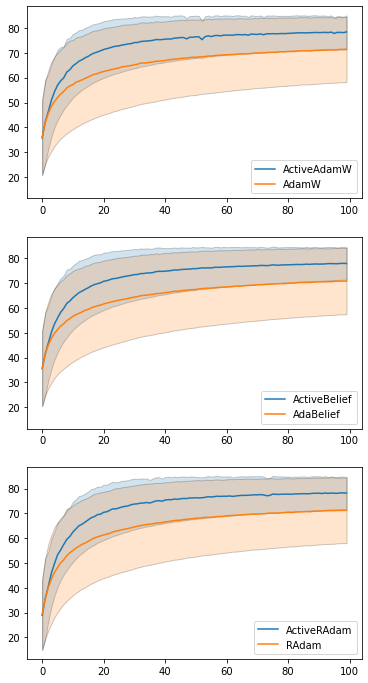

In [155]:
fig, axes = plt.subplots(3,1, sharey=True, figsize=[6,12])
hatches = {
    'ActiveAdamW': '*',
    'AdaBelief': '.',
    'AdamW': '|',
    'RAdam': 'X',
    'ActiveRAdam': 'o',
    'ActiveBelief': 'x'
}
polys=[]
optims=[('ActiveAdamW', 'AdamW'), ('ActiveBelief', 'AdaBelief'), ('ActiveRAdam', 'RAdam')]
for i, (optim, ax) in enumerate(zip(optims, axes.flatten())):
    optimA = optim[0]
    optimV = optim[1]
    meanA = logs[optimA]['mean']
    stdA = logs[optimA]['std']
    minnA = logs[optimA]['min']
    maxxA = logs[optimA]['max']
    
    meanV = logs[optimV]['mean']
    stdV = logs[optimV]['std']
    minnV = logs[optimV]['min']
    maxxV = logs[optimV]['max']
    
    lA, = ax.plot(meanA, label=optimA)
    lV, = ax.plot(meanV, label=optimV)
    colorA = lA.get_color()
    colorV = lV.get_color()

    alphaA=.2
    alphaV=.2
    
    polyA=ax.fill_between(range(mini), meanA-stdA, meanA+stdA, alpha=alphaA, edgecolor='black', facecolor=colorA)
    polyV=ax.fill_between(range(mini), meanV-stdV, meanV+stdV, alpha=alphaV, edgecolor='black', facecolor=colorV)
#     polys.append(poly)
#     optims.append(optim)
    ax.legend(loc='lower right')

# separate plots

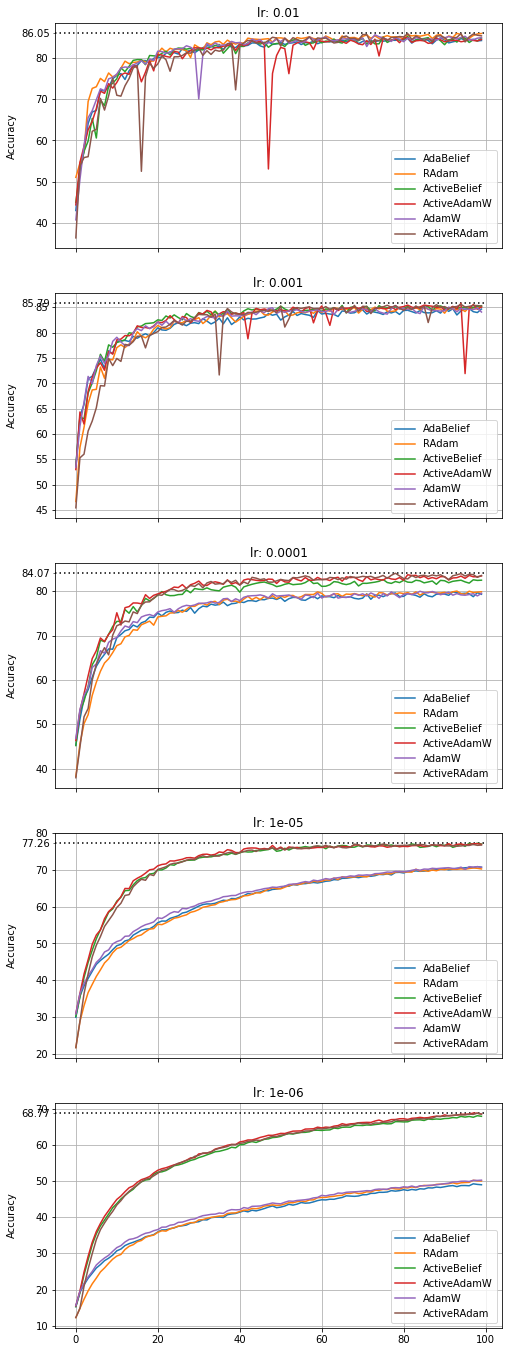

In [68]:
fig, axes = plt.subplots(5,1, sharex=True, figsize=(8,24))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[0:], axes)):
    max_y = 0
    for optim in logs.keys():
        ax.plot(logs[optim][lr].accs[:mini], label=optim)
        
        # plotting max horizontal line
        max_y = max(max(logs[optim][lr].accs[:mini]), max_y)
        
        ax.legend(loc='lower right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([max_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    ax.hlines(max_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Accuracy')
# plt.tight_layout()

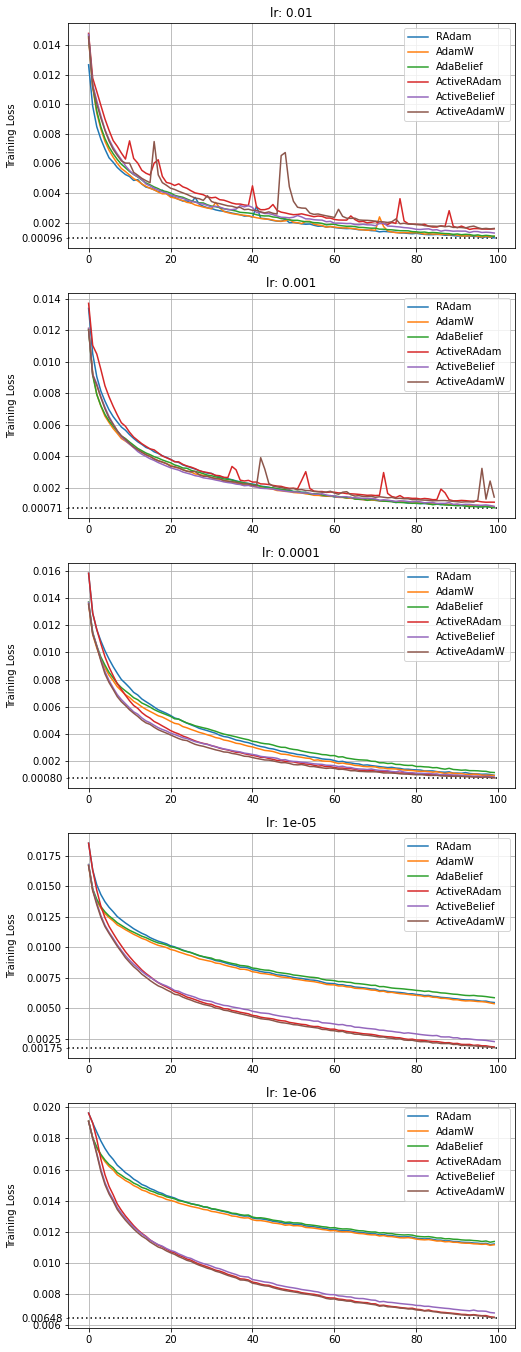

In [69]:
fig, axes = plt.subplots(5,1, sharex=False, figsize=(8,24))
for i, (lr, ax) in enumerate(zip(sorted(logs['AdamW'].keys(), reverse=True)[0:], axes)):
    min_y = float('inf')
    for optim in sorted(logs.keys(), reverse=True):
        ax.plot(logs[optim][lr].train_losses[:mini], label=optim)
        
        # plotting max horizontal line
        min_y = min(min(logs[optim][lr].train_losses[:mini]), min_y)
        
        ax.legend(loc='upper right')
        ax.set_title(f'lr: {lr}')
        ax.grid(b=True)
        ax.set_xlim(left=-5.)
    ax.set_yticks([min_y], minor=True)
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5f"))
    ax.hlines(min_y, -5, mini, color='black', linestyle=(0,(1,2)))
    ax.set_ylabel('Training Loss')
# plt.tight_layout()

In [35]:
logs['Adabelief']

{0.001: <__main__.Log at 0x7fe96ce77390>,
 1e-05: <__main__.Log at 0x7fe96dd1e2d0>,
 0.0001: <__main__.Log at 0x7fe96f340390>}